In [1]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('hr_data.csv')
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


(14999, 9)

In [4]:
#displaying unique values of categorical features
print(df['department'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [5]:
#loading employe evaluation data
ev_df = pd.read_excel('employee_satisfaction_evaluation.xlsx')
ev_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [6]:
ev_df.info()
ev_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


(14999, 3)

In [7]:
main_df = df.set_index('employee_id').join(ev_df.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [8]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [9]:
#filling in the blanks with the average values
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#setting a check point in case I make a mistake
main_df_nonull = main_df.copy()
main_df_nonull.fillna(main_df_nonull.mean(), inplace=True)
main_df_nonull.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [11]:
#verify that all null values have been replaced
main_df_nonull[main_df_nonull.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [12]:
main_df_final = main_df_nonull.drop('employee_id', axis=1)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [13]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [14]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [15]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [16]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Displaying Correlation Matrix


No handles with labels found to put in legend.


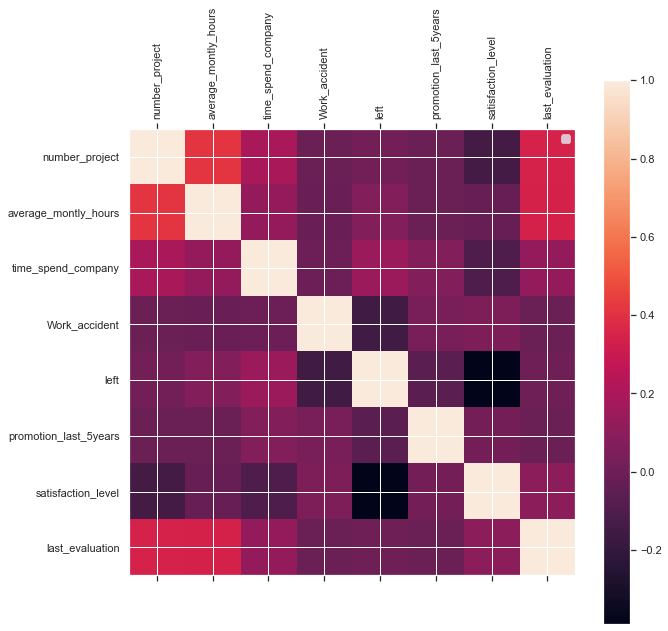

In [17]:
'''This function plots a graphical correlation matrix for each pair of columns
    in the datafrmae, inputs; df= dataframe, size= vertical & horizontal size of plot'''
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)
    

In [18]:
#getting dummy variables for categorical data
categorical = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [19]:
#Number of employess that have left, where 1 means they left and 0 means they haven't
print(len(main_df_final.loc[main_df_final['left'] == 1]))
print(len(main_df_final.loc[main_df_final['left'] == 0]))

3571
11428


In [20]:
#first we will run our model with an unbalanced dataset, then we will run it again balanced
df_stayed = main_df_final.loc[main_df_final['left'] == 0]
df_stayed.index

Int64Index([ 2000,  2001,  2002,  2003,  2004,  2005,  2006,  2007,  2008,
             2009,
            ...
            14201, 14202, 14203, 14204, 14205, 14206, 14207, 14208, 14209,
            14210],
           dtype='int64', length=11428)

In [21]:
len(df_stayed[3572:].index)

7856

In [22]:
#in order for us to have a balanced data set of target outcomes we reduce the number of true values
df_stayed_index = df_stayed[3572:].index
df_stayed_index

Int64Index([ 5572,  5573,  5574,  5575,  5576,  5577,  5578,  5579,  5580,
             5581,
            ...
            14201, 14202, 14203, 14204, 14205, 14206, 14207, 14208, 14209,
            14210],
           dtype='int64', length=7856)

In [28]:
main_df_balanced = main_df_final.drop(labels=df_stayed_index, axis = 0)
main_df_balanced = main_df_balanced.reset_index()

In [29]:
main_df_balanced

,index,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,14994,2,151,3,0,1,0,0.40,0.57,0,0,0,0,0,0,0,1,0,1,0
7139,14995,2,160,3,0,1,0,0.37,0.48,0,0,0,0,0,0,0,1,0,1,0
7140,14996,2,143,3,0,1,0,0.37,0.53,0,0,0,0,0,0,0,1,0,1,0
7141,14997,6,280,4,0,1,0,0.11,0.96,0,0,0,0,0,0,0,1,0,1,0


In [30]:
main_df_balanced = main_df_balanced.drop('index', axis=1)


In [32]:
main_df_balanced.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000
mean,3.824024,203.144617,3.483830,0.111718,0.499930,0.015260,0.555553,0.719443,0.051379,0.054739,0.056419,0.025759,0.054879,0.054039,0.272435,0.156517,0.196136,0.543469,0.408232
std,1.459132,54.034396,1.075547,0.315041,0.500035,0.122593,0.266358,0.179821,0.220785,0.227486,0.230745,0.158428,0.227760,0.226110,0.445243,0.363370,0.397100,0.498142,0.491541
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,152.000000,3.000000,0.000000,0.000000,0.000000,0.380000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000,0.560000,0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,251.000000,4.000000,0.000000,1.000000,0.000000,0.790000,0.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,7.000000,310.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Preparing dataset for Machine Learning

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#we will run the ML with the unbalanced and balanced dataset, so we declare a variable to enable us change it easily
ML_dataset = main_df_balanced

x = ML_dataset.drop(['left'], axis=1).values
y = ML_dataset['left'].values



In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [46]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
df_train = pd.DataFrame(x_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.482037,1.958203,0.476931,-0.349043,-0.129924,-1.703836,0.777174,-0.235154,-0.238451,-0.244022,-0.164027,-0.244022,-0.240784,1.636819,-0.430250,-0.491548,-1.107330,1.220672
1,-1.257150,-0.904014,-0.447354,-0.349043,-0.129924,-0.351754,-1.452830,-0.235154,4.193729,-0.244022,-0.164027,-0.244022,-0.240784,-0.610941,-0.430250,-0.491548,-1.107330,1.220672
2,0.797240,-0.386968,0.476931,-0.349043,-0.129924,0.812538,1.167425,-0.235154,-0.238451,-0.244022,-0.164027,-0.244022,-0.240784,-0.610941,2.324231,-0.491548,-1.107330,1.220672
3,-0.572353,0.517862,2.325502,-0.349043,-0.129924,1.413464,-0.560828,-0.235154,-0.238451,4.097999,-0.164027,-0.244022,-0.240784,-0.610941,-0.430250,-0.491548,-1.107330,1.220672
4,0.112444,0.388600,-0.447354,-0.349043,-0.129924,0.624749,-0.393578,-0.235154,-0.238451,-0.244022,-0.164027,-0.244022,-0.240784,-0.610941,2.324231,-0.491548,0.903073,-0.819221


### We train a logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 82.45%
[[853 233]
 [143 914]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1086
           1       0.80      0.86      0.83      1057

    accuracy                           0.82      2143
   macro avg       0.83      0.83      0.82      2143
weighted avg       0.83      0.82      0.82      2143



### Let's try a Random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = model.score(x_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.41%
[[1074   12]
 [  22 1035]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1086
           1       0.99      0.98      0.98      1057

    accuracy                           0.98      2143
   macro avg       0.98      0.98      0.98      2143
weighted avg       0.98      0.98      0.98      2143



In [53]:
#we are creating a table that shows the importances of each feature to our model
feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = pd.DataFrame(x_train).columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

In [54]:
feature_importances

,importance
5,0.273329
2,0.261959
0,0.148020
1,0.142990
6,0.118343
3,0.012851
16,0.008831
15,0.004684
17,0.004569
14,0.004354


### Let's try deep Learning next

In [55]:
#we will use tensorflow 2.0
%tensorflow_version 2.x


UsageError: Line magic function `%tensorflow_version` not found.


In [57]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [60]:
# training our Classifier
batch_size = 10
epochs = 25

history = model.fit(x_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
500/500 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.8162 - val_loss: 0.3721 - val_accuracy: 0.8642
Epoch 2/25
500/500 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.8840 - val_loss: 0.2841 - val_accuracy: 0.8913
Epoch 3/25
500/500 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.8968 - val_loss: 0.2553 - val_accuracy: 0.9020
Epoch 4/25
500/500 [==============================] - 1s 2ms/step - loss: 0.2533 - accuracy: 0.9060 - val_loss: 0.2380 - val_accuracy: 0.9081
Epoch 5/25
500/500 [==============================] - 1s 2ms/step - loss: 0.2415 - accuracy: 0.9114 - val_loss: 0.2258 - val_accuracy: 0.9146
Epoch 6/25
500/500 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9158 - val_loss: 0.2194 - val_accuracy: 0.9239
Epoch 7/25
500/500 [==============================] - 1s 2ms/step - loss: 0.2265 - accuracy: 0.9200 - val_loss: 0.2132 - val_accuracy: 0.9197
Epoch 

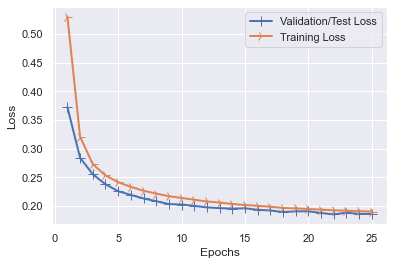

In [61]:
#plotting our loss charts 
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

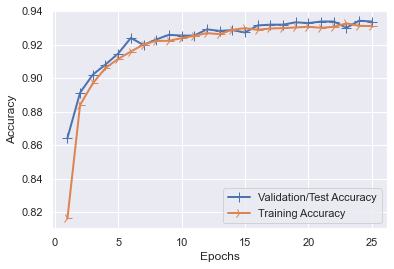

In [62]:
#plotting accuracy charts 
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()